In [1]:
# Setup and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
with open('iteration_data_2.pkl', 'rb') as f:
    results = pickle.load(f)

print(f"Loaded {len(results)} iterations")
print(f"Data structure: {results[0].keys() if results else 'Empty'}")

Loaded 20 iterations
Data structure: dict_keys(['iteration', 'x', 'objective'])


In [2]:
# Extract Data
# Extract all data from results
iterations = [int(x['iteration']) for x in results]
objectives = [float(x['objective']) for x in results]
stiffness_arrays = [x['x'] for x in results]

# Find minimum
min_idx = np.argmin(objectives)
min_cost = objectives[min_idx]
min_iter = iterations[min_idx]
optimal_stiffness = stiffness_arrays[min_idx]

print(f"Minimum cost: {min_cost:.3f} J/kg/m at iteration {min_iter}")

Minimum cost: 30.355 J/kg/m at iteration 5


## Plot 1: Optimization Convergence

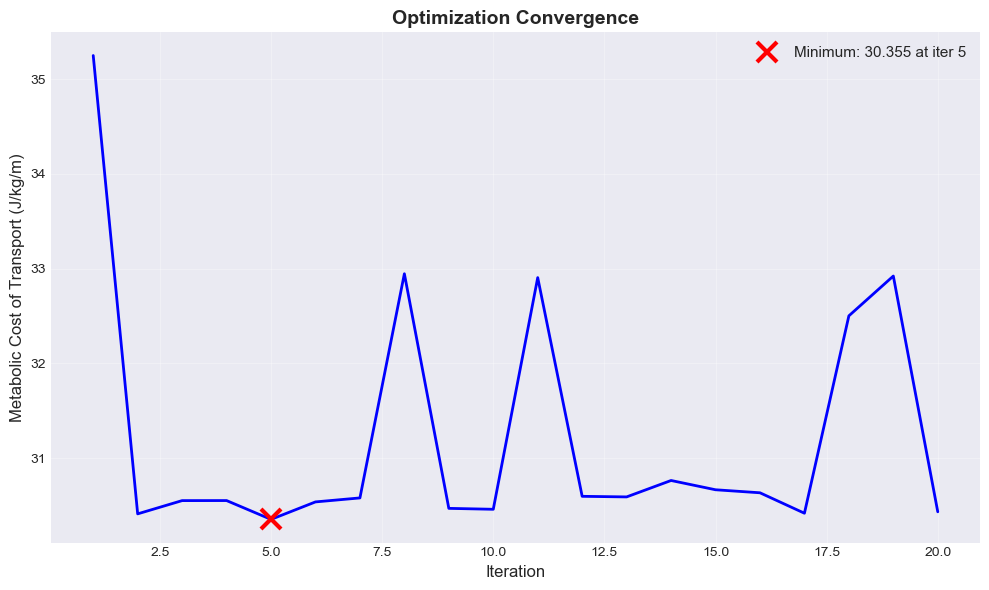

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iterations, objectives, 'b-', linewidth=2)
ax.plot(min_iter, min_cost, 'rx', markersize=15, markeredgewidth=3, 
        label=f'Minimum: {min_cost:.3f} at iter {min_iter}')
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Metabolic Cost of Transport (J/kg/m)', fontsize=12)
ax.set_title('Optimization Convergence', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

## Plot 2: Temperature Schedule
Note: Temperature data needs to be saved in the pickle file

In [4]:
if 'temperature' in results[0]:
    temperatures = [x['temperature'] for x in results]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(iterations, temperatures, 'r-', linewidth=2)
    ax.set_xlabel('Iteration', fontsize=12)
    ax.set_ylabel('Temperature', fontsize=12)
    ax.set_title('Simulated Annealing Temperature Schedule', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Temperature data not available in results")

Temperature data not available in results


## Plot 3: Acceptance Rate
Shows how often worse solutions were accepted (exploration vs exploitation)

In [5]:
if 'accepted' in results[0]:
    # Calculate rolling acceptance rate
    window = 5
    accepted = [x['accepted'] for x in results]
    acceptance_rate = pd.Series(accepted).rolling(window=window).mean()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(iterations, acceptance_rate, 'g-', linewidth=2)
    ax.set_xlabel('Iteration', fontsize=12)
    ax.set_ylabel(f'Acceptance Rate (rolling {window} iterations)', fontsize=12)
    ax.set_title('Solution Acceptance Rate', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Acceptance data not available in results")

Acceptance data not available in results


## Plot 4: Stiffness Evolution (All Segments)
Shows how each segment's stiffness changed over iterations

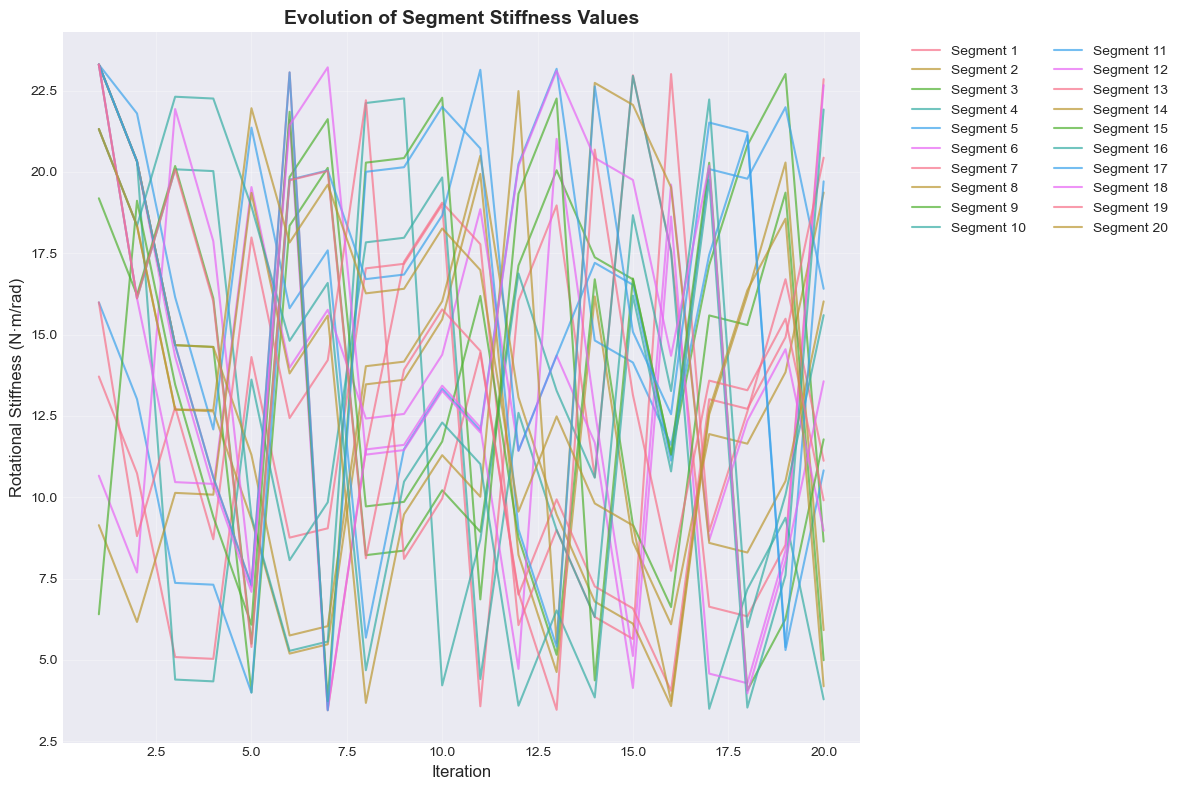

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

# Convert to array for easier manipulation
stiffness_matrix = np.array(stiffness_arrays)
n_segments = stiffness_matrix.shape[1]

# Plot each segment
for seg in range(n_segments):
    ax.plot(iterations, stiffness_matrix[:, seg], 
            label=f'Segment {seg+1}', alpha=0.7, linewidth=1.5)

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Rotational Stiffness (N·m/rad)', fontsize=12)
ax.set_title('Evolution of Segment Stiffness Values', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

## Plot 5: Stiffness Heatmap
Visualizes parameter changes across all segments and iterations

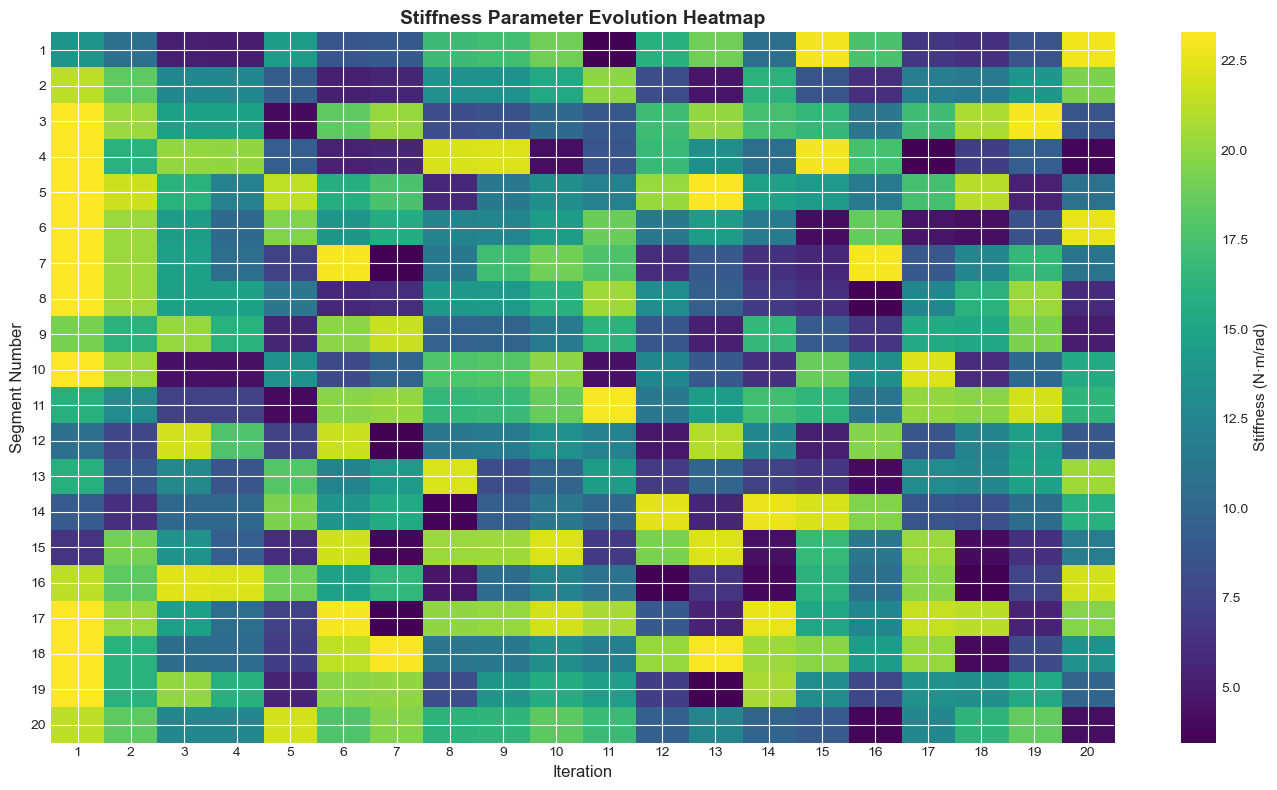

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

# Transpose so segments are rows, iterations are columns
heatmap_data = stiffness_matrix.T

im = ax.imshow(heatmap_data, aspect='auto', cmap='viridis', interpolation='nearest')
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Segment Number', fontsize=12)
ax.set_title('Stiffness Parameter Evolution Heatmap', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(iterations)))
ax.set_xticklabels(iterations)
ax.set_yticks(range(n_segments))
ax.set_yticklabels(range(1, n_segments + 1))

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Stiffness (N·m/rad)', fontsize=11)
plt.tight_layout()
plt.show()

## Plot 6: Best Solution Bar Chart
Final optimal stiffness values for each segment

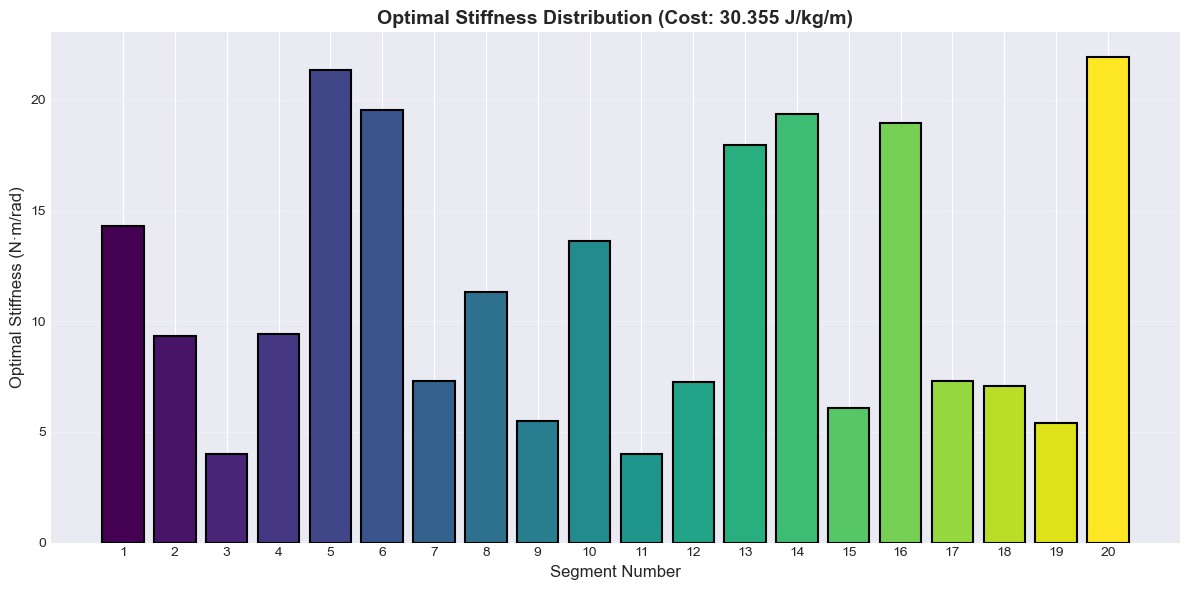

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

segments = np.arange(1, len(optimal_stiffness) + 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(optimal_stiffness)))

bars = ax.bar(segments, optimal_stiffness, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Segment Number', fontsize=12)
ax.set_ylabel('Optimal Stiffness (N·m/rad)', fontsize=12)
ax.set_title(f'Optimal Stiffness Distribution (Cost: {min_cost:.3f} J/kg/m)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(segments)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Plot 7: Initial vs Optimal Comparison
Side-by-side comparison showing how parameters changed

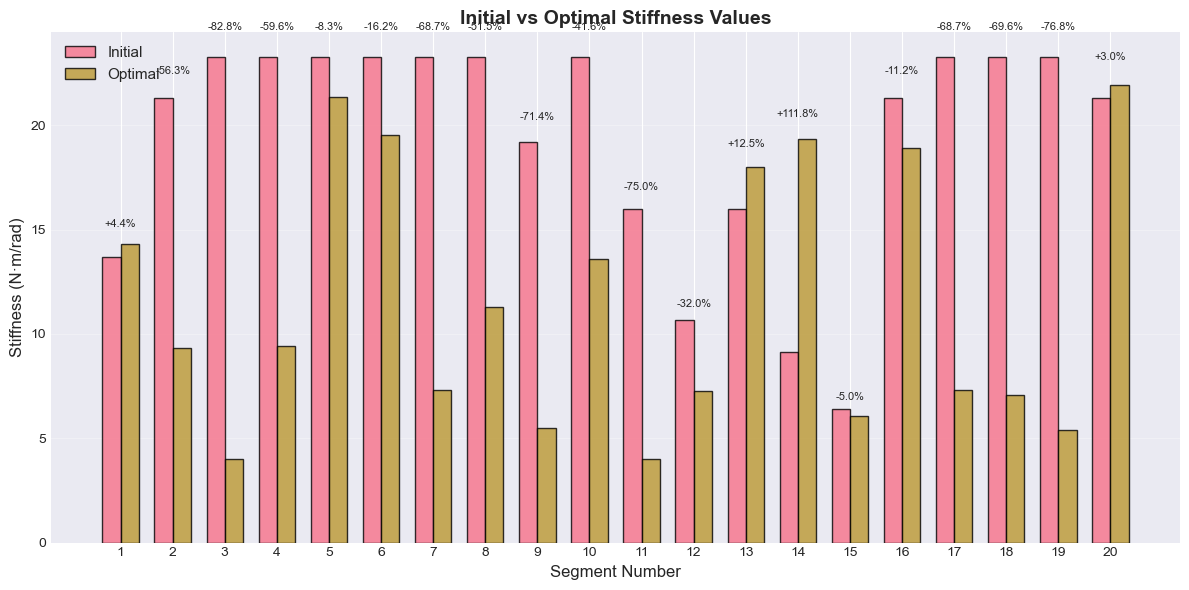

In [9]:
initial_stiffness = stiffness_arrays[0]

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, len(optimal_stiffness) + 1)
width = 0.35

bars1 = ax.bar(x - width/2, initial_stiffness, width, label='Initial', 
               alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, optimal_stiffness, width, label='Optimal', 
               alpha=0.8, edgecolor='black')

ax.set_xlabel('Segment Number', fontsize=12)
ax.set_ylabel('Stiffness (N·m/rad)', fontsize=12)
ax.set_title('Initial vs Optimal Stiffness Values', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add percentage change annotations
for i, (init, opt) in enumerate(zip(initial_stiffness, optimal_stiffness)):
    change = ((opt - init) / init) * 100
    ax.text(i + 1, max(init, opt) * 1.05, f'{change:+.1f}%', 
            ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Plot 8: Parameter Change Magnitude
Shows exploration vs refinement behavior

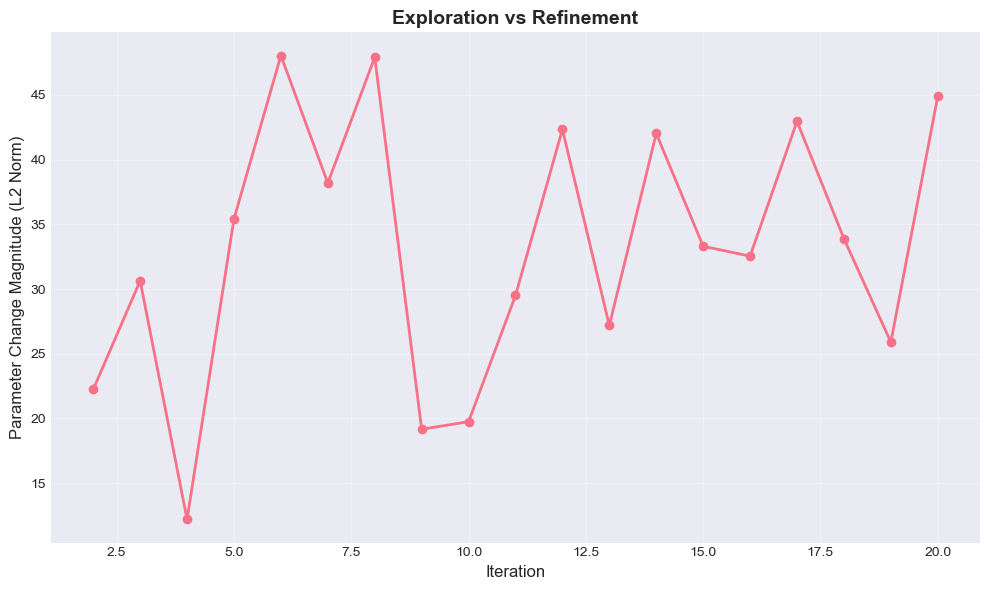

In [10]:
changes = []
for i in range(1, len(stiffness_arrays)):
    delta = np.linalg.norm(stiffness_arrays[i] - stiffness_arrays[i-1])
    changes.append(delta)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iterations[1:], changes, 'o-', linewidth=2, markersize=6)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Parameter Change Magnitude (L2 Norm)', fontsize=12)
ax.set_title('Exploration vs Refinement', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Plot 9: Cost Distribution
Distribution of solutions explored during optimization

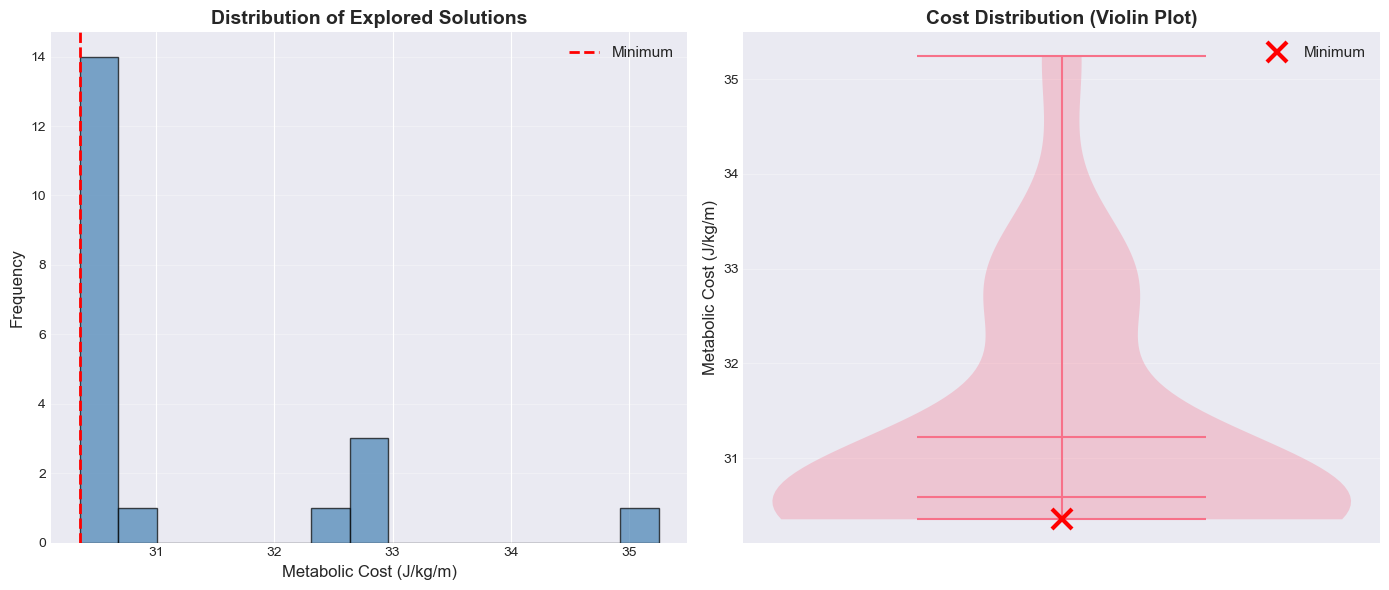

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
ax1.hist(objectives, bins=15, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(min_cost, color='red', linestyle='--', linewidth=2, label='Minimum')
ax1.set_xlabel('Metabolic Cost (J/kg/m)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Explored Solutions', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Violin plot
parts = ax2.violinplot([objectives], positions=[1], widths=0.7, 
                       showmeans=True, showmedians=True)
ax2.plot(1, min_cost, 'rx', markersize=15, markeredgewidth=3, label='Minimum')
ax2.set_ylabel('Metabolic Cost (J/kg/m)', fontsize=12)
ax2.set_title('Cost Distribution (Violin Plot)', fontsize=14, fontweight='bold')
ax2.set_xticks([])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Summary Statistics

In [12]:
print("="*60)
print("OPTIMIZATION SUMMARY STATISTICS")
print("="*60)
print(f"\nTotal Iterations: {len(results)}")
print(f"\nCost Statistics:")
print(f"  Initial Cost:  {objectives[0]:.4f} J/kg/m")
print(f"  Final Cost:    {objectives[-1]:.4f} J/kg/m")
print(f"  Minimum Cost:  {min_cost:.4f} J/kg/m (iteration {min_iter})")
print(f"  Mean Cost:     {np.mean(objectives):.4f} J/kg/m")
print(f"  Std Dev:       {np.std(objectives):.4f} J/kg/m")
print(f"  Improvement:   {((objectives[0] - min_cost) / objectives[0] * 100):.2f}%")

print(f"\nStiffness Statistics:")
print(f"  Number of segments: {len(optimal_stiffness)}")
print(f"  Mean optimal stiffness: {np.mean(optimal_stiffness):.2f} N·m/rad")
print(f"  Std dev: {np.std(optimal_stiffness):.2f} N·m/rad")
print(f"  Min segment stiffness: {np.min(optimal_stiffness):.2f} N·m/rad")
print(f"  Max segment stiffness: {np.max(optimal_stiffness):.2f} N·m/rad")

# Create summary table
summary_df = pd.DataFrame({
    'Segment': range(1, len(optimal_stiffness) + 1),
    'Initial Stiffness': initial_stiffness,
    'Optimal Stiffness': optimal_stiffness,
    'Change (%)': [((o-i)/i*100) for i, o in zip(initial_stiffness, optimal_stiffness)]
})

print("\nSegment-by-Segment Summary:")
print(summary_df.to_string(index=False))

OPTIMIZATION SUMMARY STATISTICS

Total Iterations: 20

Cost Statistics:
  Initial Cost:  35.2487 J/kg/m
  Final Cost:    30.4351 J/kg/m
  Minimum Cost:  30.3551 J/kg/m (iteration 5)
  Mean Cost:     31.2285 J/kg/m
  Std Dev:       1.2995 J/kg/m
  Improvement:   13.88%

Stiffness Statistics:
  Number of segments: 20
  Mean optimal stiffness: 11.55 N·m/rad
  Std dev: 6.08 N·m/rad
  Min segment stiffness: 3.99 N·m/rad
  Max segment stiffness: 21.96 N·m/rad

Segment-by-Segment Summary:
 Segment  Initial Stiffness  Optimal Stiffness  Change (%)
       1              13.71          14.308268    4.363738
       2              21.32           9.320100  -56.284711
       3              23.30           3.998268  -82.840049
       4              23.30           9.404902  -59.635616
       5              23.30          21.362163   -8.316897
       6              23.30          19.534360  -16.161546
       7              23.30           7.290528  -68.710182
       8              23.30          11.3

## Save Optimal Configuration

In [13]:
output_data = {
    'optimal_stiffness': optimal_stiffness,
    'minimum_cost': min_cost,
    'minimum_iteration': min_iter,
    'summary_statistics': summary_df
}

with open('optimal_configuration.pkl', 'wb') as f:
    pickle.dump(output_data, f)

print("\nOptimal configuration saved to 'optimal_configuration.pkl'")


Optimal configuration saved to 'optimal_configuration.pkl'
